In [1]:
import sys; sys.path.insert(0,'..')
from hashstash import *
logger.setLevel(logging.INFO)
from hashstash.profilers.engine_profiler import *

In [2]:
df=HashStashProfiler.get_profile_data(melted=True, serializers=['pickle'])
df

Iteration  \
Data Type Engine    Serializer Encoding Num Proc Raw Size (B) Operation                
pandas_df dataframe pickle     zlib+b64 8        75571        Cumulative           0   
                                                              Decode               0   
                                                              Deserialize          0   
                                                              Encode               0   
                                                              Get                  0   
...                                                                              ...   
          sqlite    pickle     zlib+b64 8        75571        Encode               0   
                                                              Get                  0   
                                                              Serialize            0   
                                                              Set                  0   
                                                              Total                0   

                                                                           Time (s)  \
Data Type Engine    Serializer Encoding Num Proc Raw Size (B) Operation               
pandas_df dataframe pickle     zlib+b64 8        75571        Cumulative   0.388963   
                                                              Decode       0.000589   
                                                              Deserialize  0.000683   
                                                              Encode       0.003577   
                                                              Get          0.004644   
...                                                                             ...   
          sqlite    pickle     zlib+b64 8        75571        Encode       0.003367   
                                                              Get          0.002969   
                                                              Serialize    0.008667   
                                                              Set          0.066325   
                                                              Total        0.069294   

                                                                           Rate (it/s)  \
Data Type Engine    Serializer Encoding Num Proc Raw Size (B) Operation                  
pandas_df dataframe pickle     zlib+b64 8        75571        Cumulative      2.570939   
                                                              Decode       1698.098785   
                                                              Deserialize  1463.980454   
                                                              Encode        279.564354   
                                                              Get           215.324401   
...                                                                                ...   
          sqlite    pickle     zlib+b64 8        75571        Encode        296.983927   
                                                              Get           336.837777   
                                                              Serialize     115.380282   
                                                              Set            15.077228   
                                                              Total          14.431269   

                                                                           Speed (MB/s)  
Data Type Engine    Serializer Encoding Num Proc Raw Size (B) Operation                  
pandas_df dataframe pickle     zlib+b64 8        75571        Cumulative       0.185288  
                                                              Decode         122.382186  
                                                              Deserialize    105.509250  
                                                              Encode          20.148237  
                                                              Get             15.518456

In [3]:
df.iloc[0]['Data Type'][0]

TypeError: 'function' object is not subscriptable

In [ ]:
# get_dataset(100, 1000000)
# generate_dataset.stash.clear()

In [ ]:
# x=get_dataset(1000, 1_00_000)
# x[0]

In [ ]:
# # import pandas as pd
# # dfs=[
# #     HashStashProfiler.run_profiles(1000, 1_000_000, progress_inner=True, num_proc=1, num_procs=[8], serializers=['pickle','hashstash']),
# #     HashStashProfiler.run_profiles(1000, 1_000_000, progress_inner=True, num_proc=8, num_procs=[1], serializers=['pickle','hashstash']),
# #     HashStashProfiler.run_profiles(1000, 1_000_000, progress_inner=True, num_proc=8, num_procs=[1], serializers=['jsonpickle'])
# # ]
# # df = pd.concat(dfs)
# import pandas as pd
# df_engines=pd.concat([
#     HashStashProfiler.run_profiles(1000, 1_000_000, progress_inner=True, num_proc=1, num_procs=[8], serializers=['pickle'])
# ])
# # df_engines = df_engines[df_engines["Engine"]!="dataframe"]

# plot_iterations2(df_engines, time_type='Total', iteration_range=(5, 1000), rolling_window=50, point_interval=50, color_by='Engine')


In [ ]:
import pandas as pd
df_engines=pd.concat([
    # HashStashProfiler.run_profiles(10000, 1_00_000, progress_inner=True, num_proc=1, num_procs=[8], serializers=['pickle'])
    HashStashProfiler.run_profiles(1000, 1_00_0000, progress_inner=True, num_proc=1, num_procs=[8], serializers=['pickle'])
])
df=df_engines
df['Data Type'] = df['Data Type'].apply(lambda x: x.split("'")[1].split("'")[-1])
df

,Iteration,Num Proc,Size,Engine,Serializer,Encoding,Data Type,Raw Size (B),Serialize Time (s),Encode Time (s),Set Time (s),Get Time (s),Decode Time (s),Deserialize Time (s),Total Time (s),Cumulative Time (s),Cumulative Size (B),Cumulative Rate (it/s),Cumulative Speed (MB/s)
0,0,8,1000000,pairtree,pickle,zlib+b64,pandas_df,639791,0.011337,0.033425,0.054783,0.011247,0.003989,0.005226,0.066030,3.181614,639791,0.000000,0.191774
1,1,8,1000000,pairtree,pickle,zlib+b64,pandas_df,639791,0.011937,0.033927,0.054893,0.011389,0.003896,0.006946,0.066282,3.182253,1279582,0.314243,0.383472
2,2,8,1000000,pairtree,pickle,zlib+b64,pandas_df,639791,0.011843,0.038540,0.055355,0.017792,0.003947,0.005082,0.073147,3.196740,1919373,0.625637,0.572601
3,3,8,1000000,pairtree,pickle,zlib+b64,pandas_df,639791,0.011271,0.033930,0.054556,0.011456,0.003824,0.005122,0.066012,3.196748,2559164,0.938454,0.763466
4,4,8,1000000,pairtree,pickle,zlib+b64,pandas_df,639791,0.012321,0.035846,0.055275,0.012349,0.003974,0.005186,0.067624,3.196751,3198955,1.251270,0.954332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,8,1000000,diskcache,pickle,zlib+b64,pandas_df,639791,0.010011,0.032289,0.054370,0.010766,0.003856,0.005103,0.065136,40.045125,637231836,24.846969,15.175670
996,996,8,1000000,diskcache,pickle,zlib+b64,pandas_df,639791,0.010176,0.032427,0.056312,0.011027,0.003885,0.005159,0.067339,40.061914,637871627,24.861517,15.184541
997,997,8,1000000,diskcache,pickle,zlib+b64,pandas_df,639791,0.010310,0.033636,0.056856,0.010770,0.003773,0.004967,0.067626,40.123706,638511418,24.848153,15.176363
998,998,8,1000000,diskcache,pickle,zlib+b64,pandas_df,639791,0.010118,0.032640,0.055642,0.011054,0.003974,0.004897,0.066696,40.142379,639151209,24.861505,15.184503


In [ ]:
groupby = ['Iteration', 'Engine', 'Data Type', 'Num Proc']
dfmelt=df.melt(id_vars=groupby, value_vars=['Set Time (s)', 'Get Time (s)'], var_name='Operation', value_name='Time (s)')
dfmelt['Operation']=dfmelt['Operation'].apply(lambda x: x.split()[0])
dfmelt

,Iteration,Engine,Data Type,Num Proc,Operation,Time (s)
0,0,pairtree,pandas_df,8,Set,0.054783
1,1,pairtree,pandas_df,8,Set,0.054893
2,2,pairtree,pandas_df,8,Set,0.055355
3,3,pairtree,pandas_df,8,Set,0.054556
4,4,pairtree,pandas_df,8,Set,0.055275
...,...,...,...,...,...,...
15995,995,diskcache,pandas_df,8,Get,0.010766
15996,996,diskcache,pandas_df,8,Get,0.011027
15997,997,diskcache,pandas_df,8,Get,0.010770
15998,998,diskcache,pandas_df,8,Get,0.011054


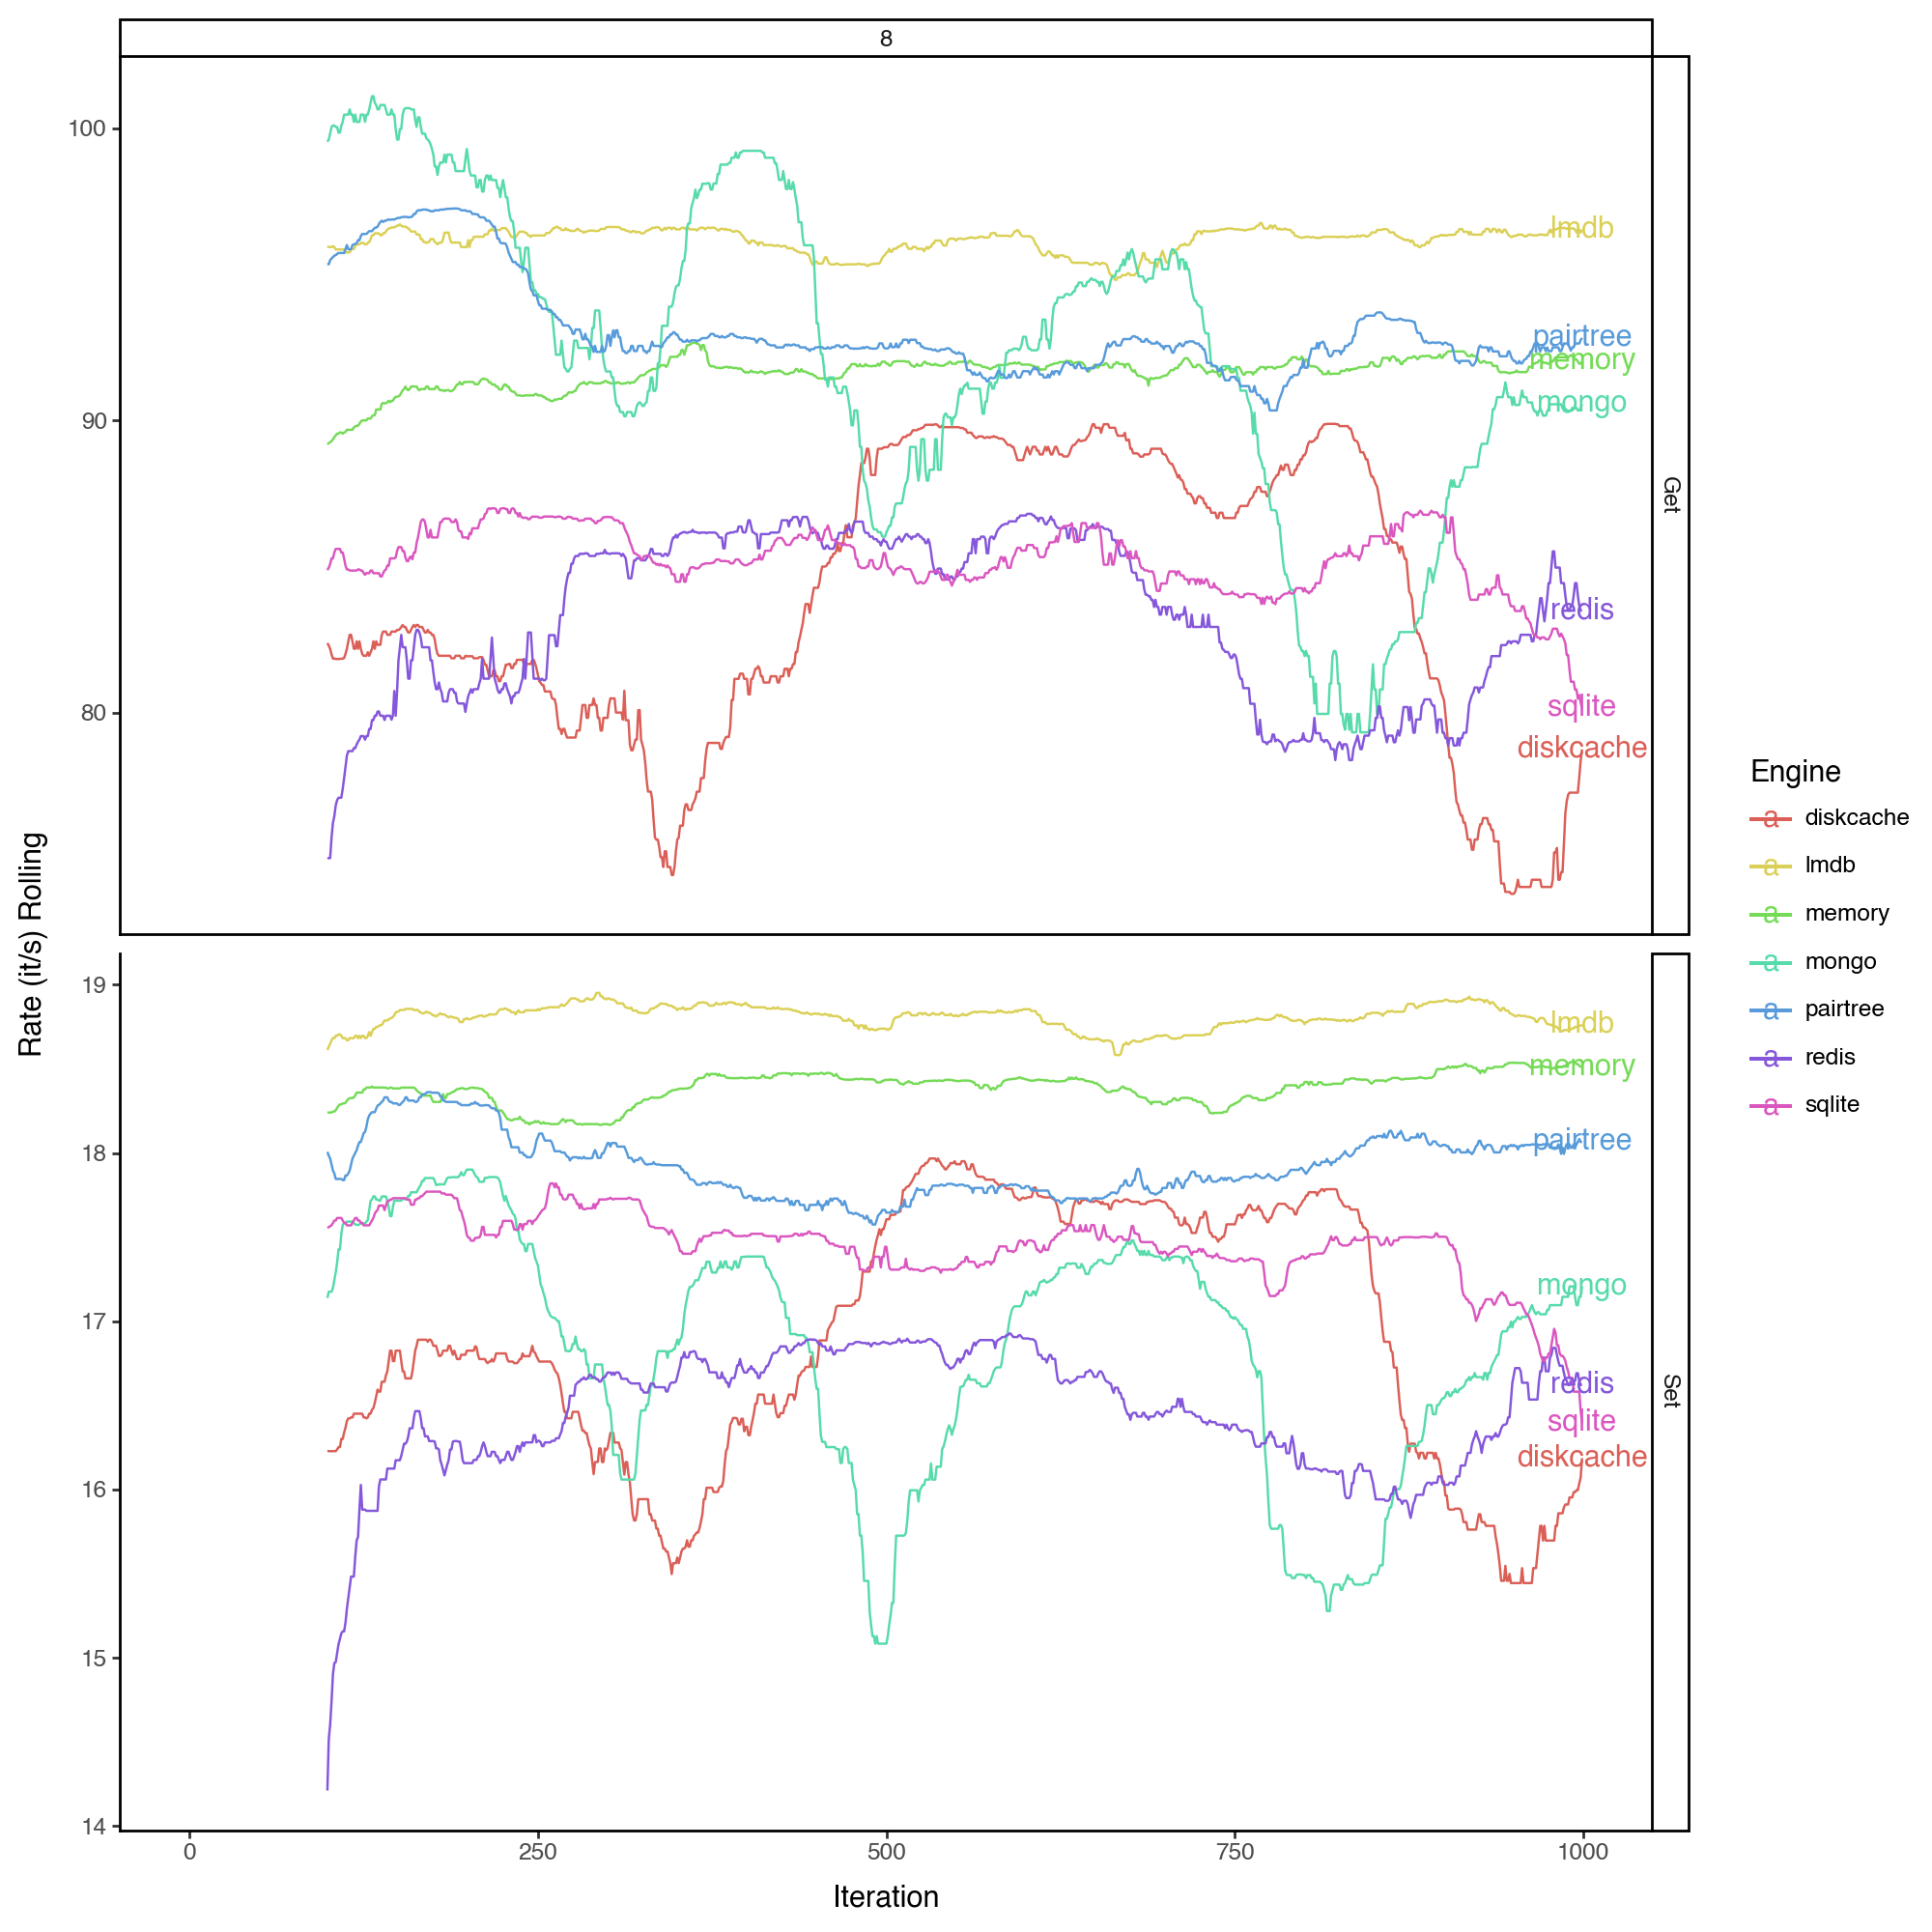

In [ ]:
import pandas as pd
import plotnine as p9
p9.options.figure_size = (10,10)

def plot_melt(df):
    # Calculate rolling average
    df=df[df.Engine != 'dataframe']
    df = df.sort_values('Iteration')
    is_dataframe_str = 'Pandas feather data saved directly to files in pairtree folder'
    is_not_dataframe_str = 'Dataframe saved to stashed data'
    df['is_dataframe_engine'] = df['Engine'].apply(lambda x: is_dataframe_str if x=='dataframe' else is_not_dataframe_str)
    df['is_dataframe_engine'] = pd.Categorical(df['is_dataframe_engine'], categories=[is_dataframe_str, is_not_dataframe_str])
    
    groupby = ['Engine', 'Data Type', 'Num Proc', 'Operation']
    df['Time (ms)'] = df['Time (s)'] * 1000
    df['Rate (it/s)'] = 1/df['Time (s)']
    df['Time (ms) Rolling'] = df.groupby(groupby)['Time (ms)'].transform(lambda x: x.rolling(window=100).median())
    df['Rate (it/s) Rolling'] = df.groupby(groupby)['Rate (it/s)'].transform(lambda x: x.rolling(window=100).median())
    figdf = df.groupby(['Iteration']+groupby).median(numeric_only=True).reset_index()
    fig = p9.ggplot(figdf, p9.aes(x='Iteration',y='Rate (it/s) Rolling',color='Engine'))
    fig+=p9.geom_line()
    fig+=p9.geom_text(p9.aes(label='Engine'), data=pd.concat(dfx.iloc[-1:] for g,dfx in figdf.groupby(groupby)))
    fig+=p9.theme_classic()
    # fig+=p9.facet_grid('is_dataframe_engine~Operation', scales='free')
    # fig+=p9.facet_wrap('Operation', scales='free_y', ncol=1)
    fig+=p9.facet_grid('Operation ~ Num Proc', scales='free_y')
    return fig


plot_melt(dfmelt)

In [ ]:
import pandas as pd
import plotnine as p9
p9.options.figure_size = (10,8)

def plot_iterations2(df, time_type='Total', iteration_range=(10, 10000), serializer='pickle', 
                     rolling_window=100, point_interval=1000, facet_by='Num Proc'):
    df = df.query(f'{iteration_range[0]}<Iteration<{iteration_range[1]}')
    df = df[df.Serializer == serializer]
    df['Iteration Group'] = df['Iteration']

    figdf = df.groupby(['Iteration','Engine','Num Proc','Serializer']).median(numeric_only=True).reset_index()
    figdf['Num Proc'] = figdf['Num Proc'].astype(str)
    figdf['Cumulative Size (MB)'] = figdf['Cumulative Size (B)'] / 1024 / 1024
    figdf['Cumulative Size (GB)'] = figdf['Cumulative Size (MB)'] / 1024
    figdf[f'{time_type} Rate (it/s)'] = 1 / figdf[f'{time_type} Time (s)']
    figdf[f'{time_type} Speed (MB/s)'] = figdf[RAW_SIZE_KEY]/1024/1024 / figdf[f'{time_type} Time (s)']
    figdf.sort_values('Iteration', inplace=True)
    figdf[f'{time_type} Rate (it/s) Rolling'] = pd.concat(
        gdf[f'{time_type} Rate (it/s)'].rolling(window=rolling_window).median()
        for _, gdf in figdf.groupby(['Engine', 'Num Proc', 'Serializer'])
    )
    figdf[f'{time_type} Speed (MB/s) Rolling'] = pd.concat(
        gdf[f'{time_type} Speed (MB/s)'].rolling(window=rolling_window).median()
        for _, gdf in figdf.groupby(['Engine', 'Num Proc', 'Serializer'])
    )

    fig = p9.ggplot(figdf, p9.aes(x='Iteration', y=f'{time_type} Rate (it/s) Rolling', color='Engine', shape='Serializer'))
    # fig = p9.ggplot(figdf, p9.aes(x='Cumulative Size (MB)', y=f'Cumulative Time (s)', color='Engine', shape='Serializer'))
    # fig = p9.ggplot(figdf, p9.aes(y='Cumulative Size (MB)', x=f'Cumulative Time (s)', color='Engine', shape='Serializer'))
    fig += p9.geom_line(alpha=.5)
    fig += p9.geom_point(alpha=.25, data=figdf[figdf.Iteration % point_interval == 0])
    fig += p9.geom_label(
        p9.aes(label='Engine'), data=pd.concat(dfx[-1:].sample(n=1) for g,dfx in figdf.groupby(['Engine','Num Proc','Serializer'])),
        size=8,
    )
    fig += p9.theme_classic()
    fig += p9.facet_wrap(facet_by, nrow=1, scales='free_y')
    # fig += p9.scale_y_log10()
    return fig

# Example usage:
# plot_iterations2(df, time_type='Get', iteration_range=(5, 1000), serializer='jsonpickle', 
#                  rolling_window=50, point_interval=50, facet_by='Engine')

In [ ]:
plot_iterations2(df, iteration_range=(10,1000), rolling_window=25)

KeyboardInterrupt: 

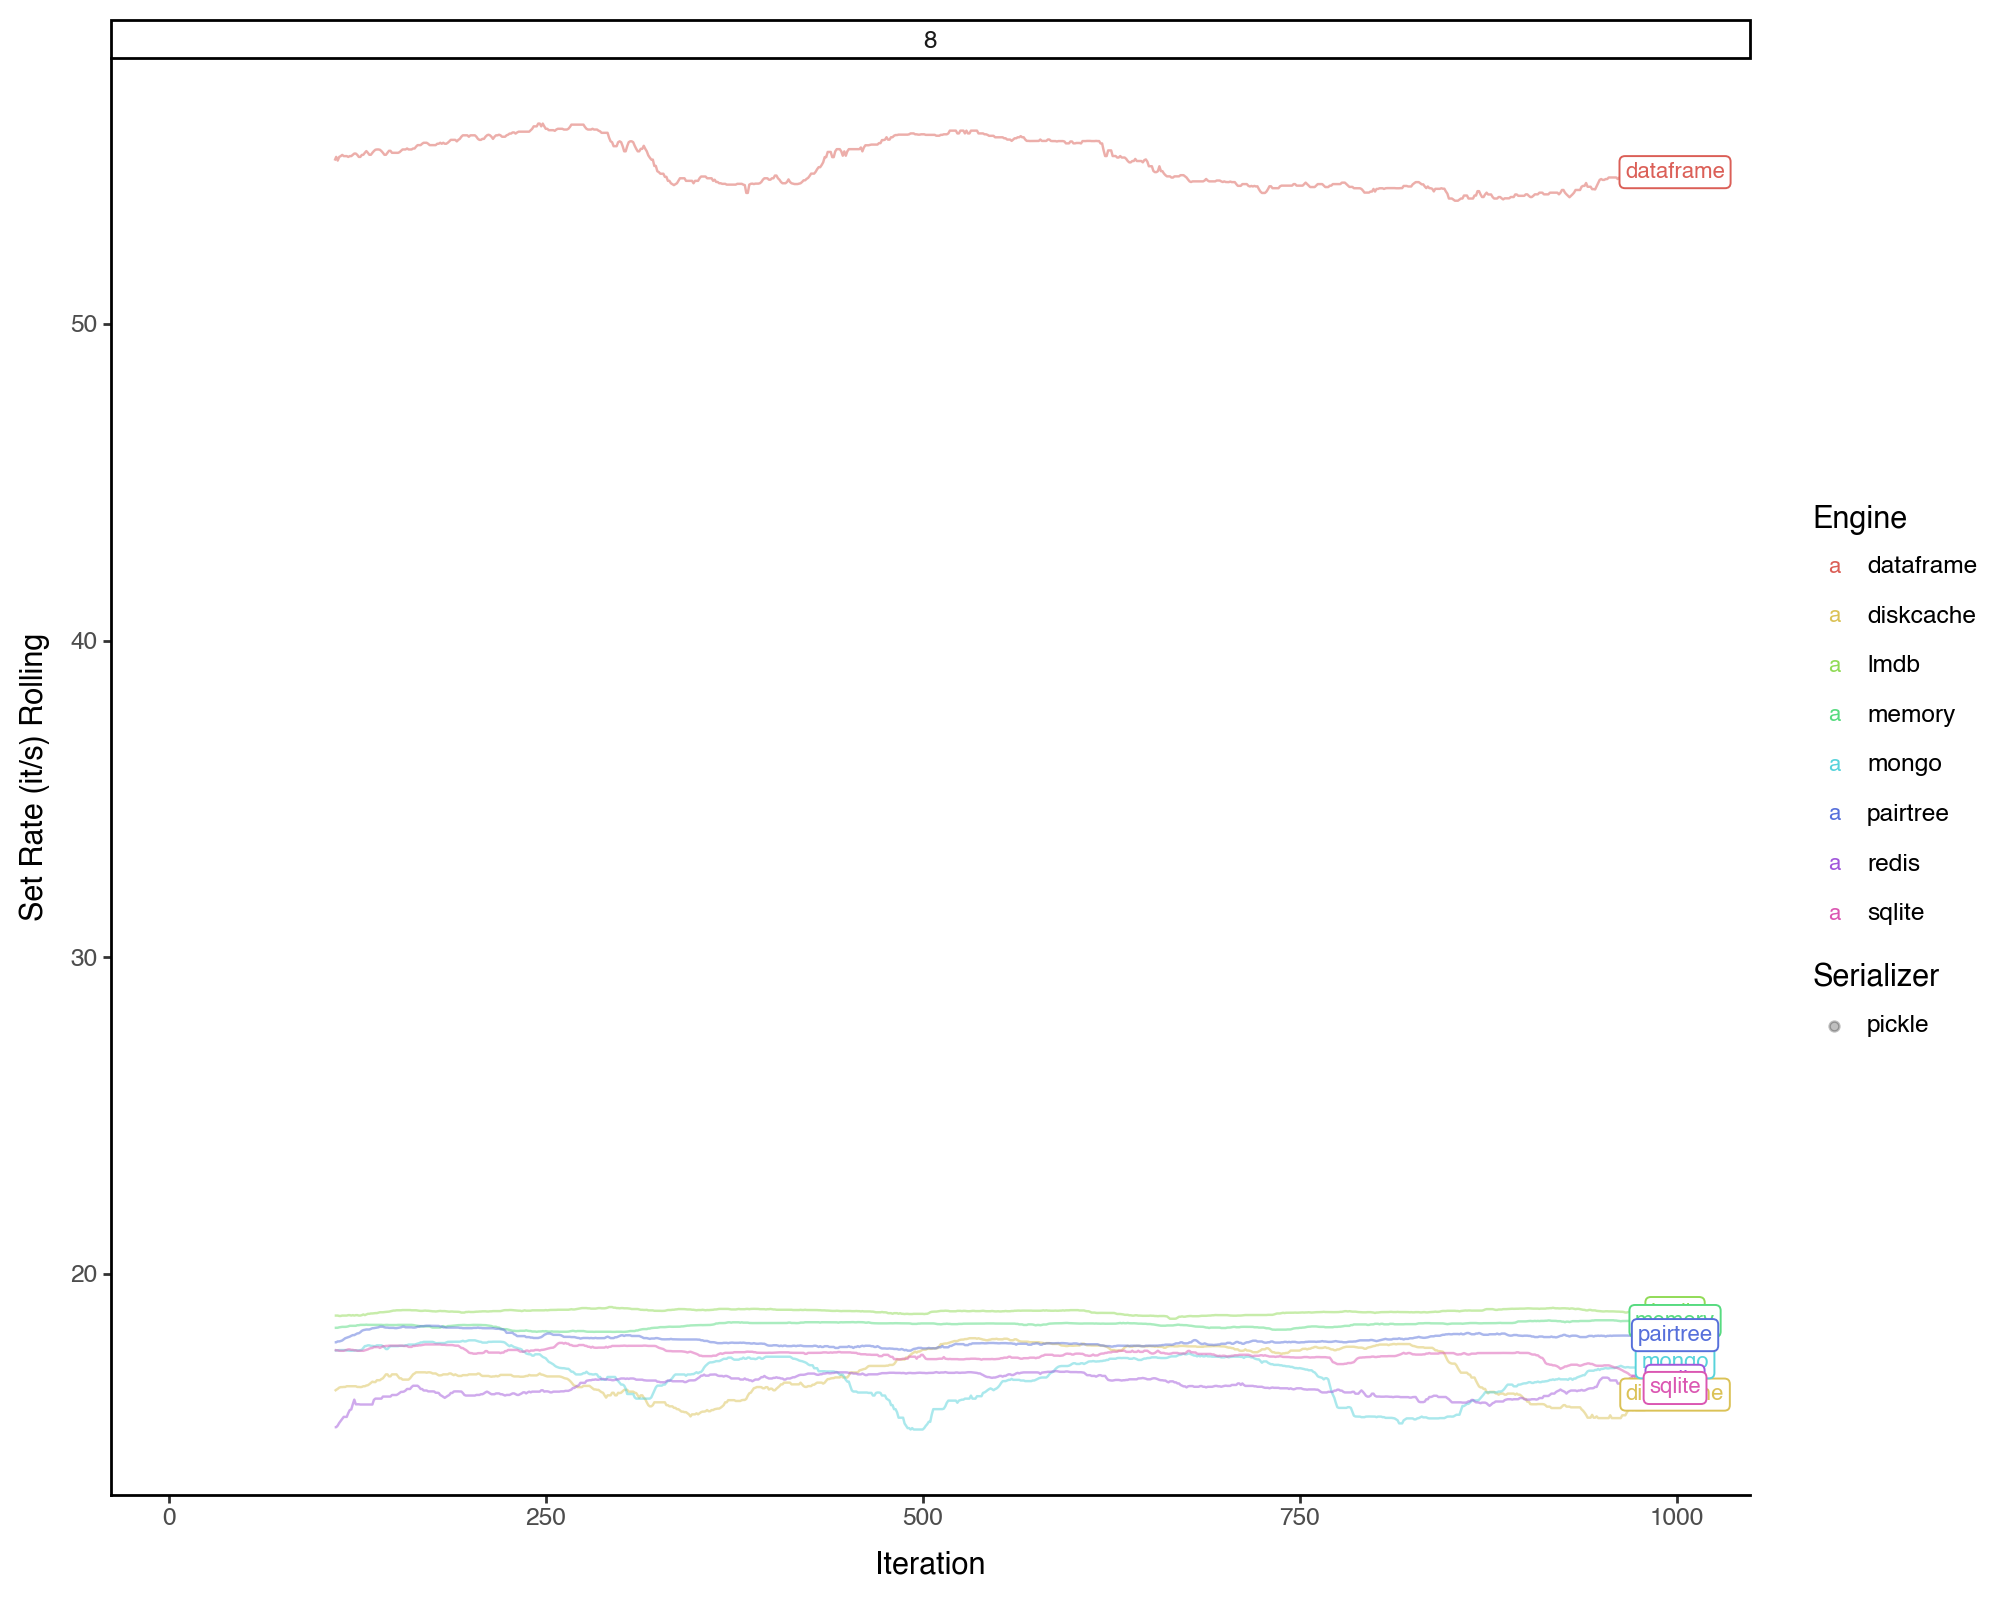

In [ ]:
plot_iterations2(df, time_type='Set')